# PUBG Player Game Data - Exploratory Data Analysis

As one of PUBG(PlayerUnknown's BattleGrounds) players, I found really interesting dataset on Kaggle (https://www.kaggle.com/c/pubg-finish-placement-prediction/overview). The team at PUBG has made official game data available for the public to explore and Kaggle collected data through the PUBG Developer API. I am going to explore this dataset and find patterns of winners. How interesting!

This is a quick guide for those who have never played PUBG before.
In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

## DATA

* DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* winPlacePerc - This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train_V2.csv')

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.info() # 4446966 rows & 29 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [5]:
df.nunique() # 4446966 players, 2026745 teams, 47965 matches, 16 match types

Id                 4446966
groupId            2026745
matchId              47965
assists                 20
boosts                  27
damageDealt          29916
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28284
matchDuration         1267
matchType               16
maxPlace               100
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33562
roadKills               14
swimDistance         28345
teamKills               11
vehicleDestroys          6
walkDistance         38599
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

In [6]:
# checking null values

display(df.isnull().any())

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

In [7]:
len(df['winPlacePerc']) - df['winPlacePerc'].count()

1

In [8]:
# There is only 1 missing value, so just drop it!

df.dropna(inplace = True)

In [9]:
display(df.isnull().any())

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc       False
dtype: bool

## Match Type

In [10]:
df['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

*There are 16 match types. However, all modes except for “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp” are from events or custom matches, which are quiet different from normal game modes. In addition, there are two types of modes - fpp meaning first person perspective and tpp meaning third person perspective. So, “solo-fpp”, “duo-fpp”, and “squad-fpp” are first person perspective game modes while “solo”, “duo”, and “squad” are third person perspective game modes. 

## TPP Mode Games

First, I will look into tpp mode games' data. Note that solo mode doesn't have team-work based features such as DBNOs and revives. 

### SOLO TPP

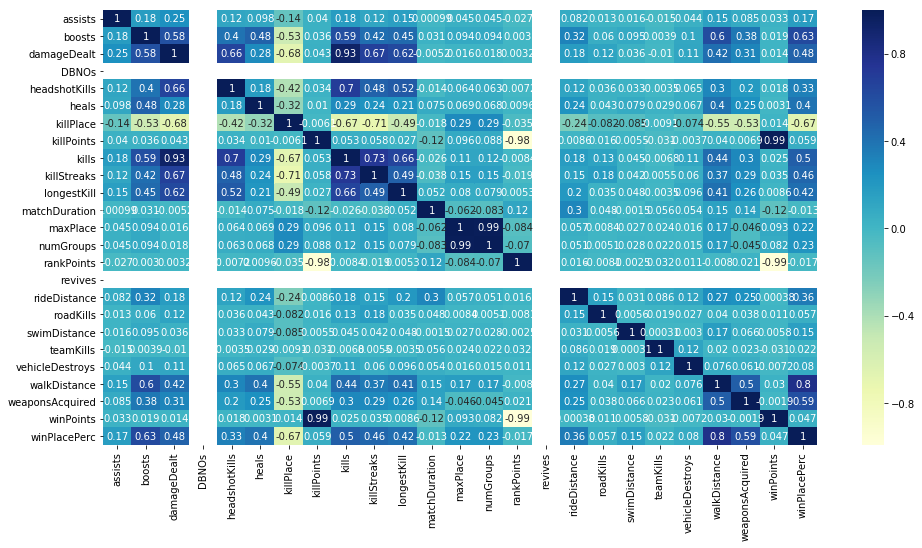

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df[df.matchType == 'solo'].corr(), annot=True, cmap="YlGnBu")

*'winPlacePerc' for solo tpp has moderate positive correlrations with 'boosts', 'kills', and 'weaponsAcquired', a strong correlation with 'walkDistance'. It also has a moderate negative correlation with 'killPlace'.

Now, I am going to look into how 'walkDistance', 'boosts', 'kills', and 'weaponsAcquired' are related to 'winPlacePerc'.

#### Walk Distance

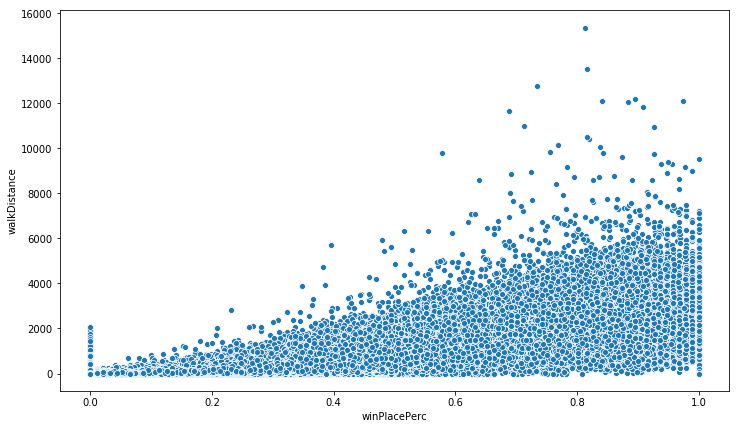

In [12]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='walkDistance', data = df[df.matchType=='solo'])

*I see some outliers here. Let's drop them first.

In [13]:
# dropping outliers

solo = df[df.matchType == 'solo']
solo.drop(solo[solo.walkDistance > solo.walkDistance.mean() + 3*solo.walkDistance.std()].index, axis=0, inplace=True)

In [14]:
solo.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
36,269c3fc4a26935,3c07be51998e6f,ce9bc89b3ca08c,0,1,100.00,0,0,0,24,...,0,0.0,0,61.0,0,0,1528.0,3,0,0.8462
63,73348483a5974b,1c8e486a643207,85601fe44d519b,0,0,17.81,0,0,0,79,...,0,129.3,0,0.0,0,0,471.9,3,1536,0.2245
69,caa1a36afeb7b2,c653cfca3b8b06,e5e181d2da0334,0,1,100.00,0,0,0,38,...,0,0.0,0,0.0,0,0,231.7,4,1500,0.1573
91,5fd62798396ca8,bb19a05801d30d,9e3c46f8acde82,0,0,36.00,0,0,0,84,...,0,0.0,0,0.0,0,0,292.6,1,0,0.1075
100,18d002b46b1abc,00a3f236559532,eccc44618c0442,0,1,236.00,0,0,7,7,...,0,0.0,0,0.0,0,0,1913.0,8,1557,0.9355


The mean of walk distance of solo tpp players is 946.046 and the median is 591.1


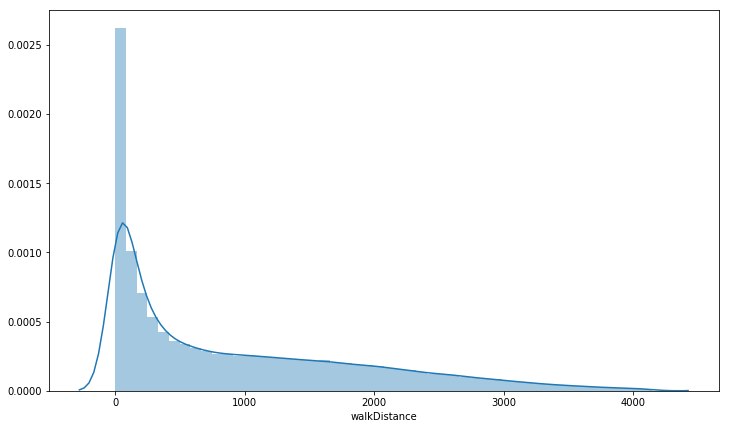

In [15]:
plt.figure(figsize=(12,7))
sns.distplot(solo.walkDistance)

print("The mean of walk distance of solo tpp players is {:.3f} and the median is {}".format(solo.walkDistance.mean(), solo.walkDistance.median()))

Text(0.5, 1.0, 'Solo TPP Winners Walk Distance')

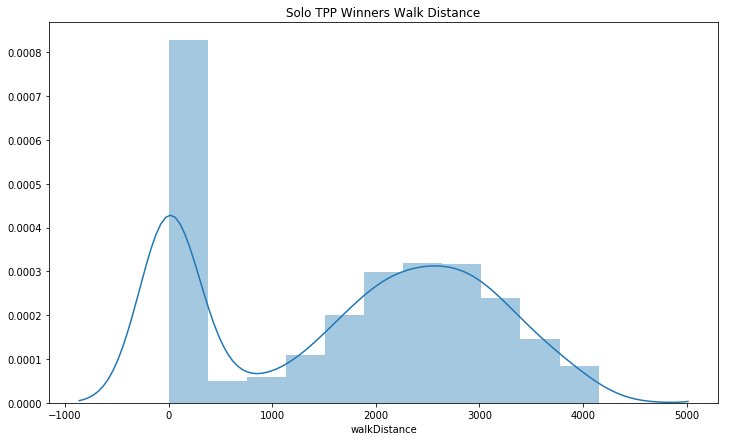

In [16]:
plt.figure(figsize=(12,7))
sns.distplot(solo[solo.winPlacePerc == 1].walkDistance).set_title("Solo TPP Winners Walk Distance")

In [17]:
print("The mean of walk distance of solo tpp losers is {:.3f} and the median is {}".format(solo[solo.winPlacePerc != 1].walkDistance.mean(), solo[solo.winPlacePerc != 1].walkDistance.median()))
print("The mean of walk distance of solo tpp winners is {:.3f} and the median is {}".format(solo[solo.winPlacePerc == 1].walkDistance.mean(), solo[solo.winPlacePerc == 1].walkDistance.median()))

The mean of walk distance of solo tpp losers is 934.714 and the median is 583.3
The mean of walk distance of solo tpp winners is 1699.484 and the median is 1999.0


In [18]:
from scipy.stats import ttest_ind

In [19]:
# testing mean difference

t, p = ttest_ind(solo[solo.winPlacePerc ==1].walkDistance,solo[solo.winPlacePerc !=1].walkDistance, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 29.9521  p = 1.56349e-170


*On average, winners walk more than other players, but there are some players who did not move that much but still won.

#### Boosts

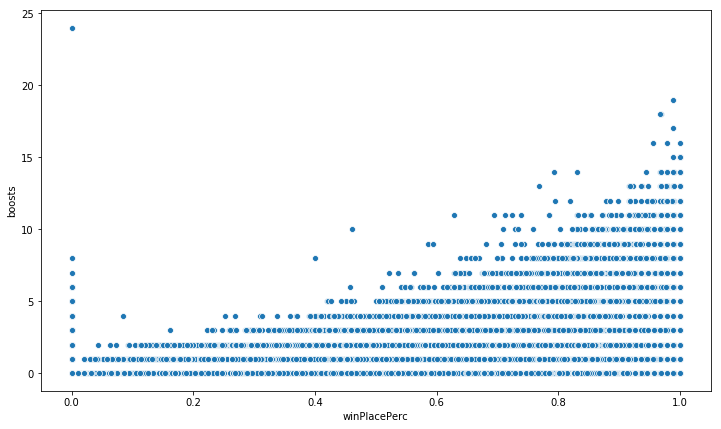

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='boosts', data = solo)

In [21]:
# dropping outliers

solo.drop(solo[solo.boosts > solo.boosts.mean() + 3*solo.boosts.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Solo TPP Players' Number of Used Boost Items")

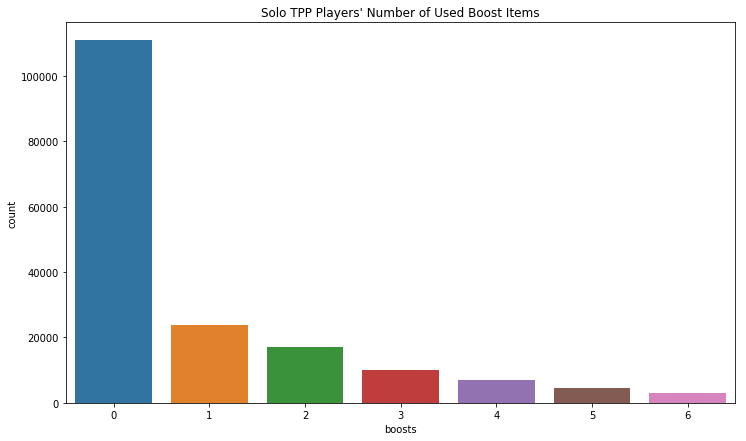

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(solo.boosts).set_title("Solo TPP Players' Number of Used Boost Items")

Text(0.5, 1.0, "Solo TPP Winners' Number of Used Boost Items")

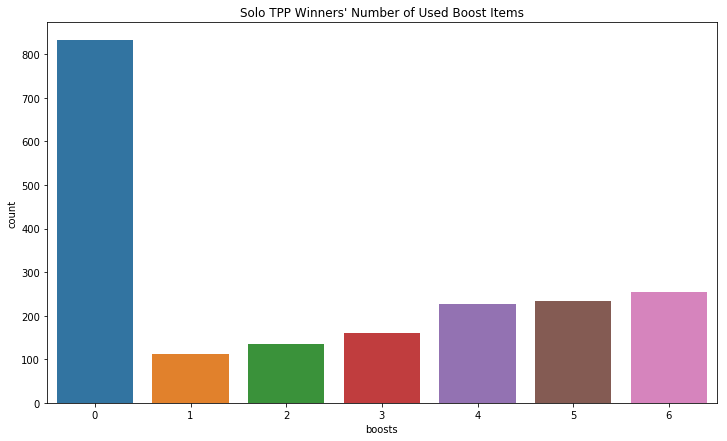

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(solo[solo.winPlacePerc==1].boosts).set_title("Solo TPP Winners' Number of Used Boost Items")

In [24]:
print("The mean number of boost items used by solo tpp winners is {:.3f} and the median is {}".format(solo[solo.winPlacePerc == 1].boosts.mean(), solo[solo.winPlacePerc == 1].boosts.median()))
print("The mean number of boost items used by solo tpp losers is {:.3f} and the median is {}".format(solo[solo.winPlacePerc != 1].boosts.mean(), solo[solo.winPlacePerc != 1].boosts.median()))

The mean number of boost items used by solo tpp winners is 2.282 and the median is 2.0
The mean number of boost items used by solo tpp losers is 0.865 and the median is 0.0


In [25]:
t, p = ttest_ind(solo[solo.winPlacePerc ==1].boosts,solo[solo.winPlacePerc !=1].boosts, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 26.9517  p = 1.82004e-136


*Winners tend to use more boost items.

#### Kills

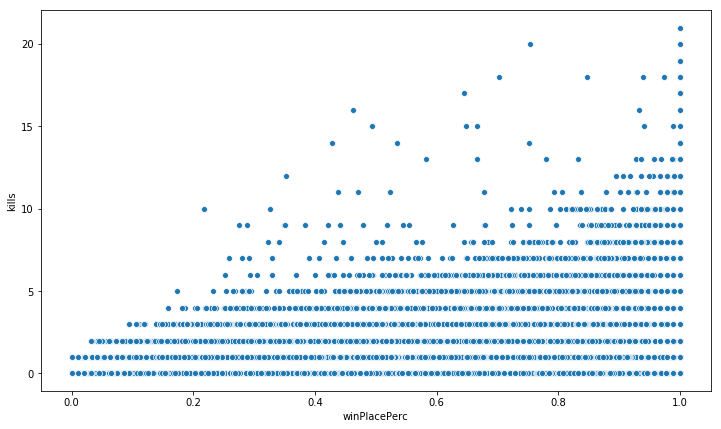

In [26]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='kills', data = solo)

In [27]:
# dropping outliers

solo.drop(solo[solo.kills > solo.kills.mean() + 3*solo.kills.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Solo TPP Losers' Number of Kills")

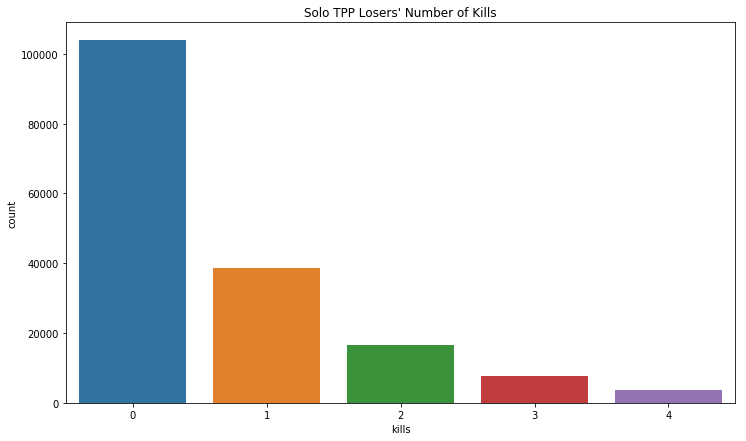

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(solo[solo.winPlacePerc!=1].kills).set_title("Solo TPP Losers' Number of Kills")

Text(0.5, 1.0, "Solo TPP Winners' Number of Kills")

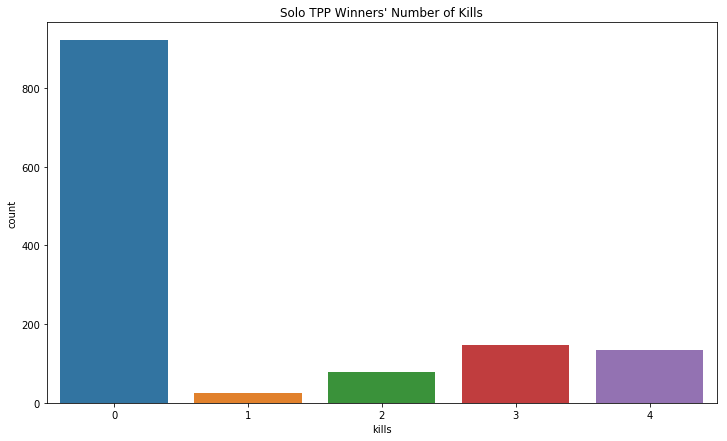

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(solo[solo.winPlacePerc==1].kills).set_title("Solo TPP Winners' Number of Kills")

In [30]:
print("The mean number of Kills by solo tpp winners is {:.3f} and the median is {}".format(solo[solo.winPlacePerc == 1].kills.mean(), solo[solo.winPlacePerc == 1].kills.median()))
print("The mean number of Kills by solo tpp losers is {:.3f} and the median is {}".format(solo[solo.winPlacePerc != 1].kills.mean(), solo[solo.winPlacePerc != 1].kills.median()))

The mean number of Kills by solo tpp winners is 0.886 and the median is 0.0
The mean number of Kills by solo tpp losers is 0.646 and the median is 0.0


In [31]:
# testing mean difference

t, p = ttest_ind(solo[solo.winPlacePerc ==1].kills,solo[solo.winPlacePerc !=1].kills , equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 5.92162  p = 4.06577e-09


*Winners tend to use more boost items, but most of winners did not take boost items like losers. 

#### Weapons Acquired

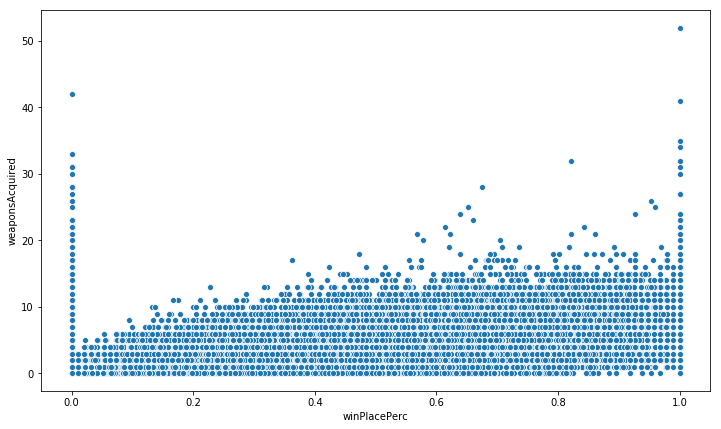

In [32]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='weaponsAcquired', data = solo)

In [33]:
# dropping outliers

solo.drop(solo[solo.weaponsAcquired > solo.weaponsAcquired.mean() + 3*solo.weaponsAcquired.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Solo TPP Losers' Number of Weapons Acquired")

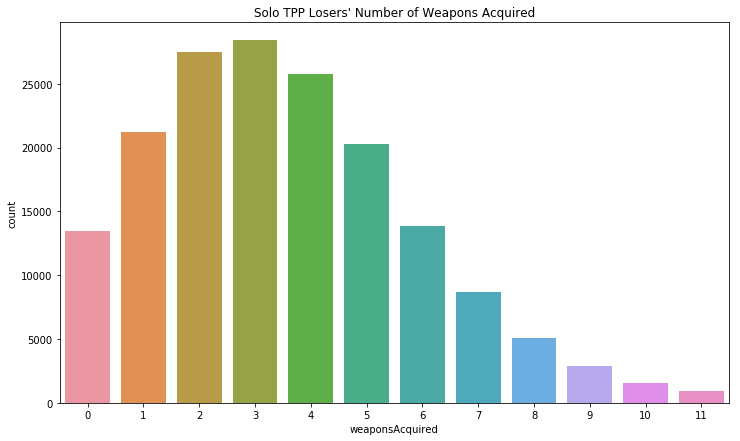

In [34]:
plt.figure(figsize=(12,7))
sns.countplot(solo[solo.winPlacePerc!=1].weaponsAcquired).set_title("Solo TPP Losers' Number of Weapons Acquired")

Text(0.5, 1.0, "Solo TPP Winners' Number of Weapons Acquired")

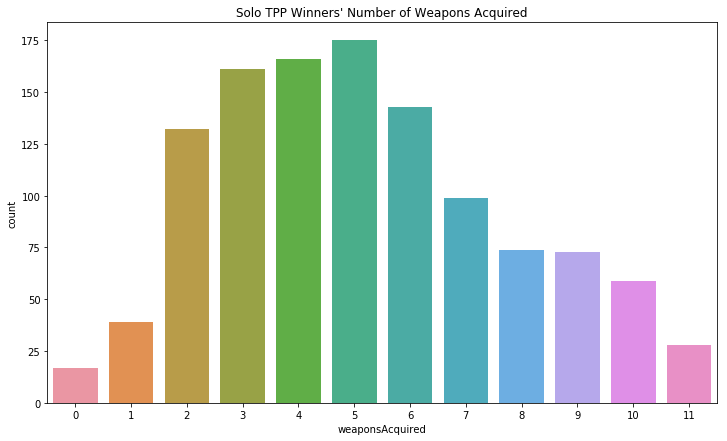

In [35]:
plt.figure(figsize=(12,7))
sns.countplot(solo[solo.winPlacePerc==1].weaponsAcquired).set_title("Solo TPP Winners' Number of Weapons Acquired")

In [36]:
print("The mean number of Weapons acquired by solo tpp winners is {:.3f} and the median is {}".format(solo[solo.winPlacePerc == 1].weaponsAcquired.mean(), solo[solo.winPlacePerc == 1].weaponsAcquired.median()))
print("The mean number of Weapons acquired by solo tpp losers is {:.3f} and the median is {}".format(solo[solo.winPlacePerc != 1].weaponsAcquired.mean(), solo[solo.winPlacePerc != 1].weaponsAcquired.median()))

The mean number of Weapons acquired by solo tpp winners is 5.166 and the median is 5.0
The mean number of Weapons acquired by solo tpp losers is 3.549 and the median is 3.0


In [37]:
# testing mean difference

t, p = ttest_ind(solo[solo.winPlacePerc ==1].weaponsAcquired,solo[solo.winPlacePerc !=1].weaponsAcquired, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 21.1836  p = 1.21249e-84


*Winners tend to get more weapons while playing.

### DUO TPP

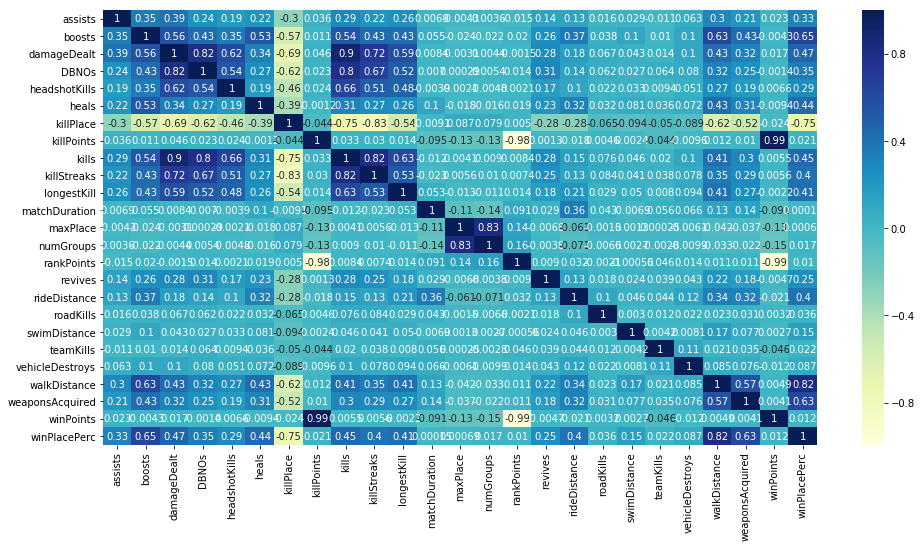

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(df[df.matchType == 'duo'].corr(), annot=True, cmap="YlGnBu")

*'winPlacePerc' for duo tpp has moderate positive correlrations with 'boosts' and 'weaponsAcquired', a strong correlation with 'walkDistance'. It also has a strong negative correlation with 'killPlace'.

#### Walk Distance

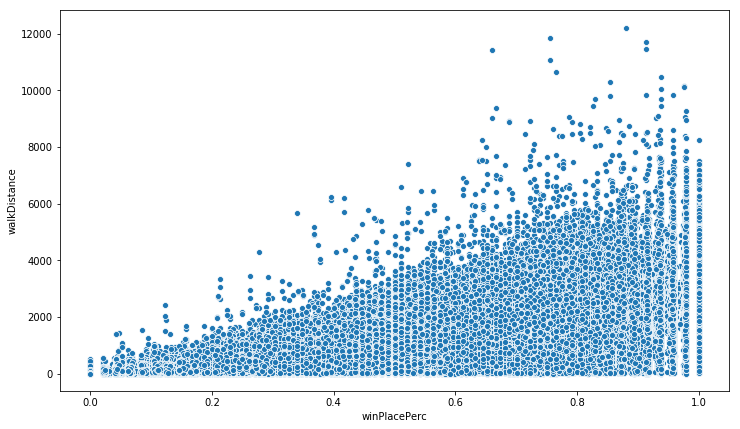

In [39]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='walkDistance', data = df[df.matchType=='duo'])

In [40]:
# dropping outliers

duo = df[df.matchType == 'duo']
duo.drop(duo[duo.walkDistance > duo.walkDistance.mean() + 3*duo.walkDistance.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Duo TPP Losers' Walk Distance")

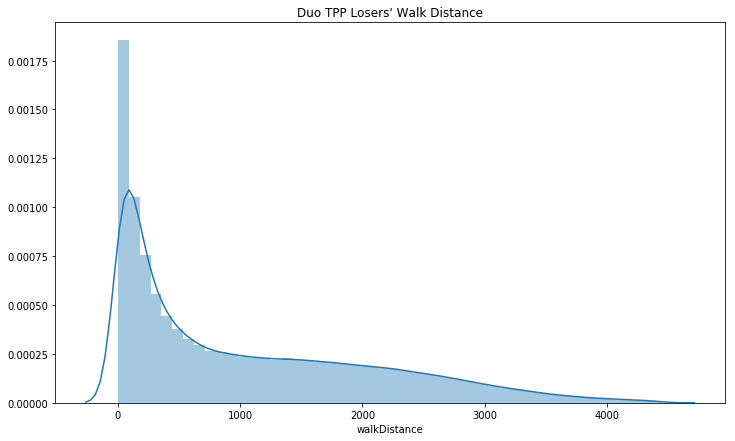

In [41]:
plt.figure(figsize=(12,7))
sns.distplot(duo[duo.winPlacePerc!=1].walkDistance).set_title("Duo TPP Losers' Walk Distance")

Text(0.5, 1.0, "Duo TPP Winners' Walk Distance")

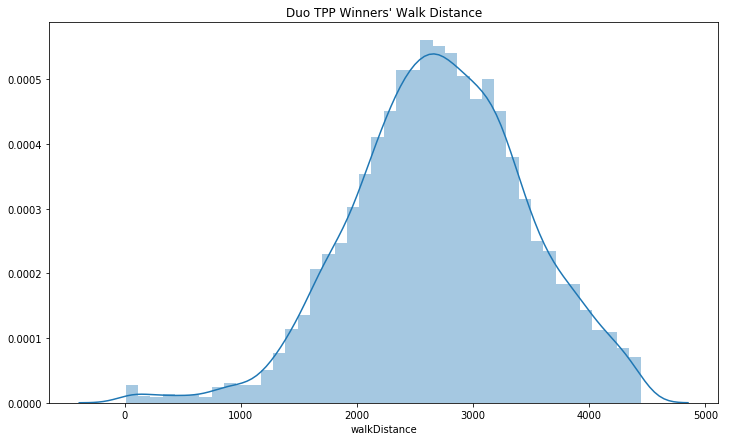

In [42]:
plt.figure(figsize=(12,7))
sns.distplot(duo[duo.winPlacePerc==1].walkDistance).set_title("Duo TPP Winners' Walk Distance")

In [43]:
print("The mean of walk distance of duo tpp losers is {:.3f} and the median is {}".format(duo[duo.winPlacePerc != 1].walkDistance.mean(), duo[duo.winPlacePerc != 1].walkDistance.median()))
print("The mean of walk distance of duo tpp winners is {:.3f} and the median is {}".format(duo[duo.winPlacePerc == 1].walkDistance.mean(), duo[duo.winPlacePerc == 1].walkDistance.median()))

The mean of walk distance of duo tpp losers is 1060.731 and the median is 697.0
The mean of walk distance of duo tpp winners is 2716.092 and the median is 2720.0


In [44]:
# testing mean difference

t, p = ttest_ind(duo[duo.winPlacePerc ==1].walkDistance,duo[duo.winPlacePerc !=1].walkDistance, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 173.714  p = 0


*Unlike solo tpp, duo winners definitely walked more than losers. On average, they walked around twice more.

#### Boosts

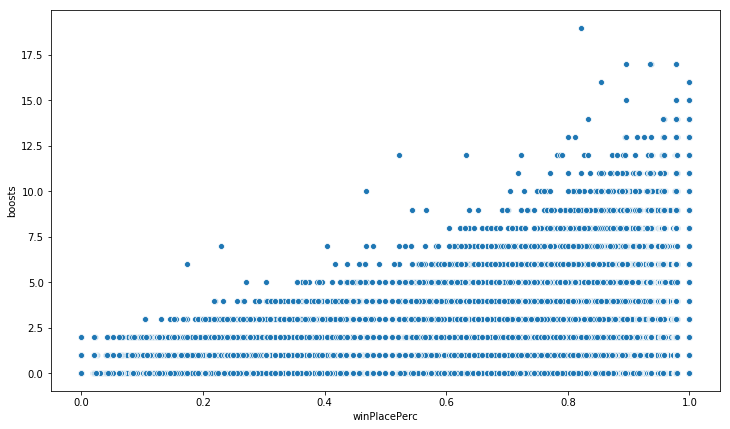

In [45]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='boosts', data = duo)

In [46]:
# dropping outliers

duo.drop(duo[duo.boosts > duo.boosts.mean() + 3*duo.boosts.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Duo TPP Losers' Used Boost Items")

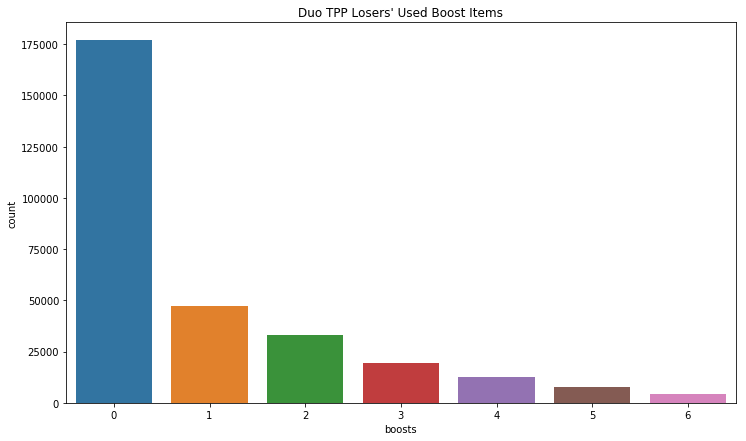

In [47]:
plt.figure(figsize=(12,7))
sns.countplot(duo[duo.winPlacePerc!=1].boosts).set_title("Duo TPP Losers' Used Boost Items")

Text(0.5, 1.0, "Duo TPP Winners' Used Boost Items")

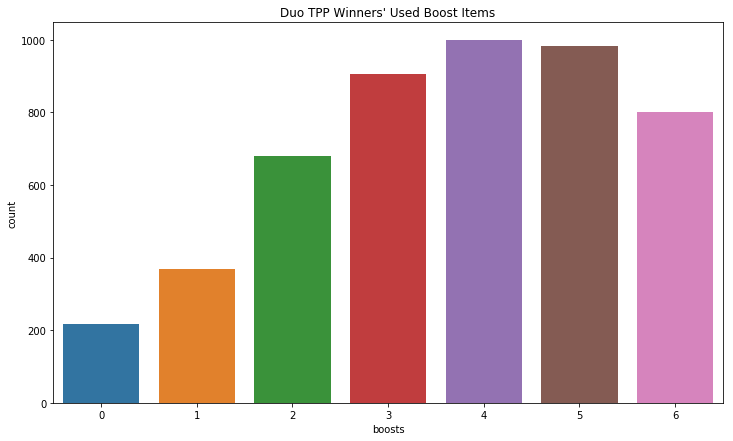

In [48]:
plt.figure(figsize=(12,7))
sns.countplot(duo[duo.winPlacePerc==1].boosts).set_title("Duo TPP Winners' Used Boost Items")

In [49]:
print("The mean number of boost items used by duo tpp losers is {:.3f} and the median is {}".format(duo[duo.winPlacePerc != 1].boosts.mean(), duo[duo.winPlacePerc != 1].boosts.median()))
print("The mean number of boost items used by duo tpp winners is {:.3f} and the median is {}".format(duo[duo.winPlacePerc == 1].boosts.mean(), duo[duo.winPlacePerc == 1].boosts.median()))

The mean number of boost items used by duo tpp losers is 0.945 and the median is 0.0
The mean number of boost items used by duo tpp winners is 3.665 and the median is 4.0


In [50]:
# testing mean difference

t, p = ttest_ind(duo[duo.winPlacePerc ==1].boosts,duo[duo.winPlacePerc !=1].boosts, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 112.981  p = 0


*Unlike solo tpp, there is a distinct difference in distributions of boost items used between losers and winners. Winners definitely used more boost itmes than losers.

#### Weapons Acquired

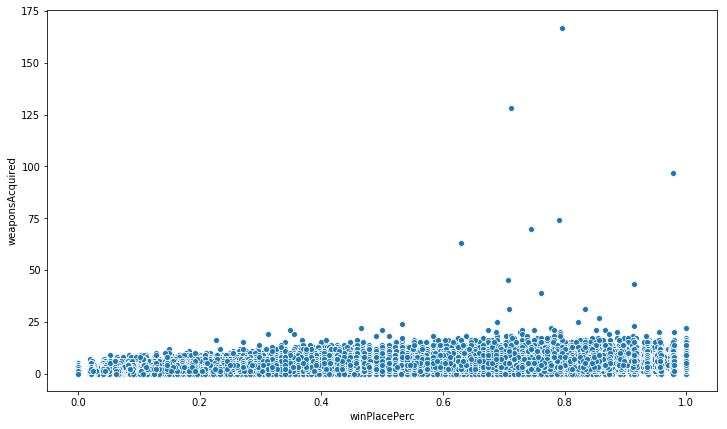

In [51]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='weaponsAcquired', data = duo)

In [52]:
# dropping outliers

duo.drop(duo[duo.weaponsAcquired > duo.weaponsAcquired.mean() + 3*duo.weaponsAcquired.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Duo TPP Losers' Number of Weapons Acquired")

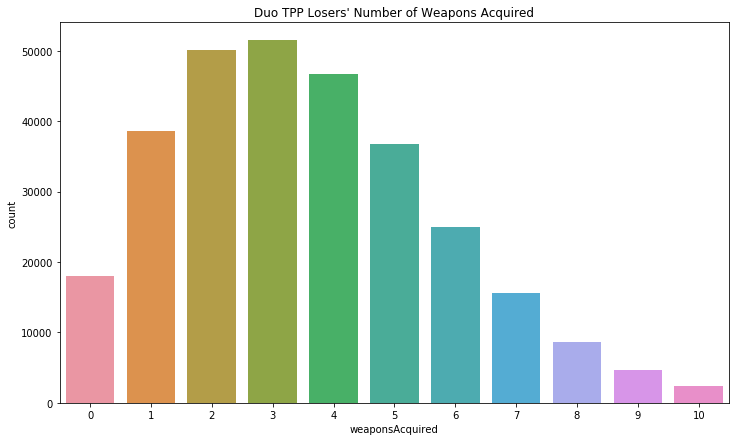

In [53]:
plt.figure(figsize=(12,7))
sns.countplot(duo[duo.winPlacePerc!=1].weaponsAcquired).set_title("Duo TPP Losers' Number of Weapons Acquired")

Text(0.5, 1.0, "Duo TPP Winners' Number of Weapons Acquired")

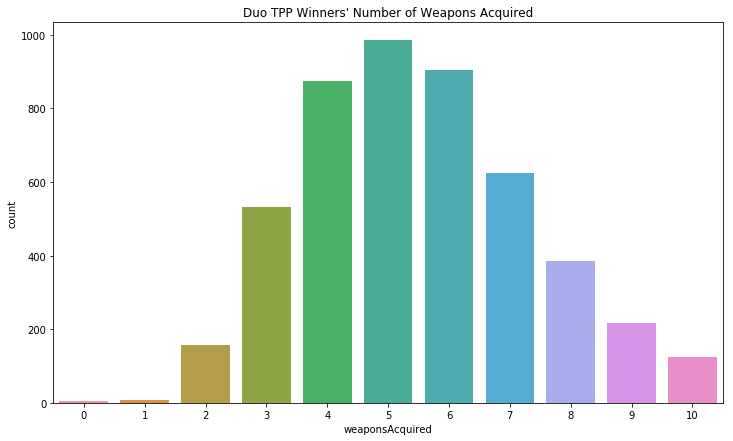

In [54]:
plt.figure(figsize=(12,7))
sns.countplot(duo[duo.winPlacePerc==1].weaponsAcquired).set_title("Duo TPP Winners' Number of Weapons Acquired")

In [55]:
print("The mean number of weapons acquired by duo tpp losers is {:.3f} and the median is {}".format(duo[duo.winPlacePerc != 1].weaponsAcquired.mean(), duo[duo.winPlacePerc != 1].weaponsAcquired.median()))
print("The mean number of weapons acquired by duo tpp winners is {:.3f} and the median is {}".format(duo[duo.winPlacePerc == 1].weaponsAcquired.mean(), duo[duo.winPlacePerc == 1].weaponsAcquired.median()))

The mean number of weapons acquired by duo tpp losers is 3.551 and the median is 3.0
The mean number of weapons acquired by duo tpp winners is 5.486 and the median is 5.0


In [56]:
# testing mean difference

t, p = ttest_ind(duo[duo.winPlacePerc ==1].weaponsAcquired,duo[duo.winPlacePerc !=1].weaponsAcquired, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 70.7145  p = 0


*Winners definitely had more weapons than losers. On average, winners had 2 more weapons than losers.

#### Kills

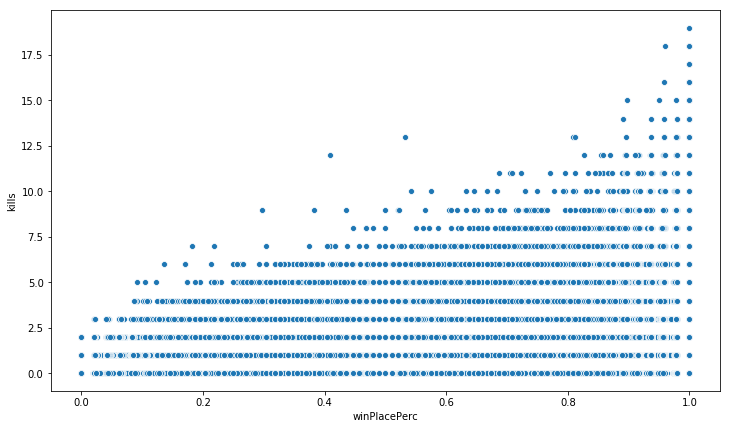

In [57]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='kills', data = duo)

In [58]:
# dropping outliers

duo.drop(duo[duo.kills > duo.kills.mean() + 3*duo.kills.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Duo TPP Losers' Number of Kills")

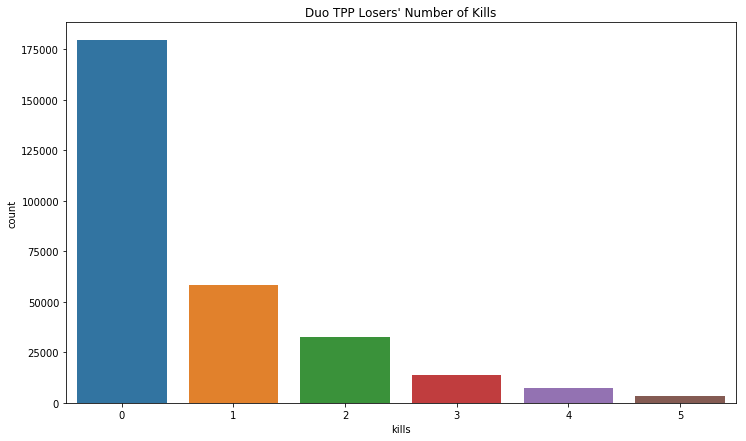

In [59]:
plt.figure(figsize=(12,7))
sns.countplot(duo[duo.winPlacePerc!=1].kills).set_title("Duo TPP Losers' Number of Kills")

Text(0.5, 1.0, "Duo TPP Winners' Number of Kills")

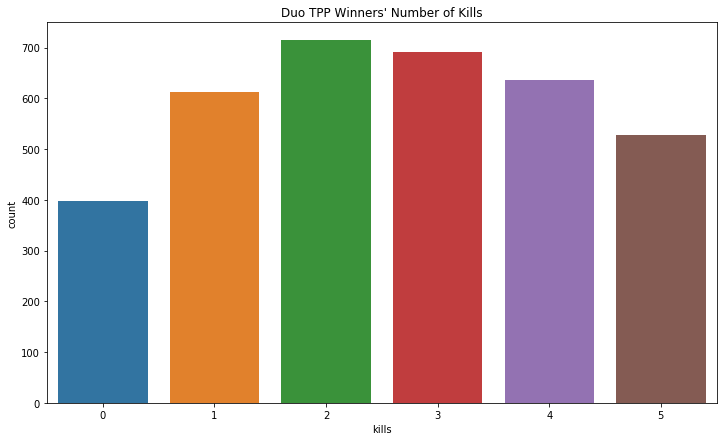

In [60]:
plt.figure(figsize=(12,7))
sns.countplot(duo[duo.winPlacePerc==1].kills).set_title("Duo TPP Winners' Number of Kills")

In [61]:
print("The mean number of kills by duo tpp losers is {:.3f} and the median is {}".format(duo[duo.winPlacePerc != 1].kills.mean(), duo[duo.winPlacePerc != 1].kills.median()))
print("The mean number of kills by duo tpp winners is {:.3f} and the median is {}".format(duo[duo.winPlacePerc == 1].kills.mean(), duo[duo.winPlacePerc == 1].kills.median()))

The mean number of kills by duo tpp losers is 0.713 and the median is 0.0
The mean number of kills by duo tpp winners is 2.598 and the median is 3.0


In [62]:
# testing mean difference

t, p = ttest_ind(duo[duo.winPlacePerc ==1].kills,duo[duo.winPlacePerc !=1].kills, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 71.2893  p = 0


*Duo tpp winners killed 2 more people than losers on average.

### Squad TPP

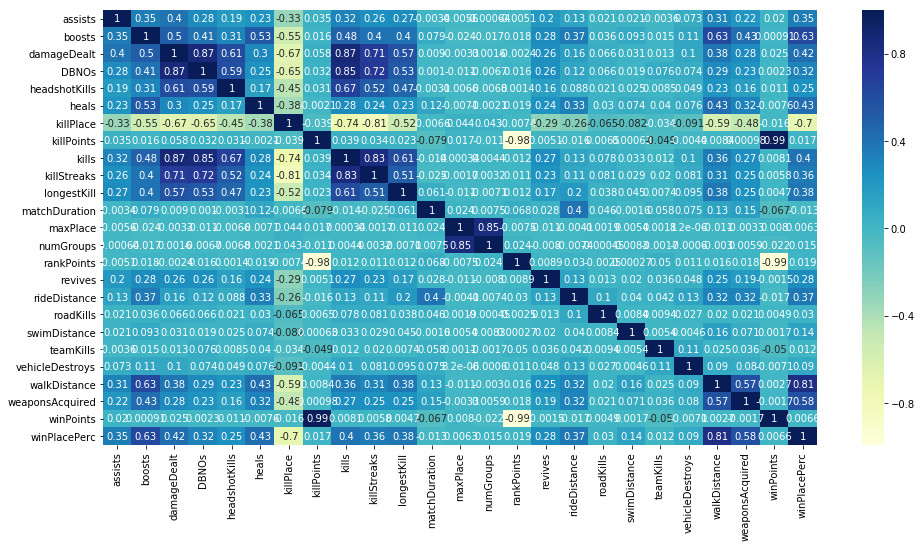

In [63]:
plt.figure(figsize=(16,8))
sns.heatmap(df[df.matchType == 'squad'].corr(), annot=True, cmap="YlGnBu")

*'winPlacePerc' for duo tpp has moderate positive correlrations with 'boosts' and 'weaponsAcquired', a strong correlation with 'walkDistance'. It also has a moderate negative correlation with 'killPlace'.

#### Walk Distance

In [64]:
# dropping outliers

sq = df[df.matchType == 'squad']
sq.drop(sq[sq.walkDistance > sq.walkDistance.mean() + 3*sq.walkDistance.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Squad TPP Losers' Walk Distance")

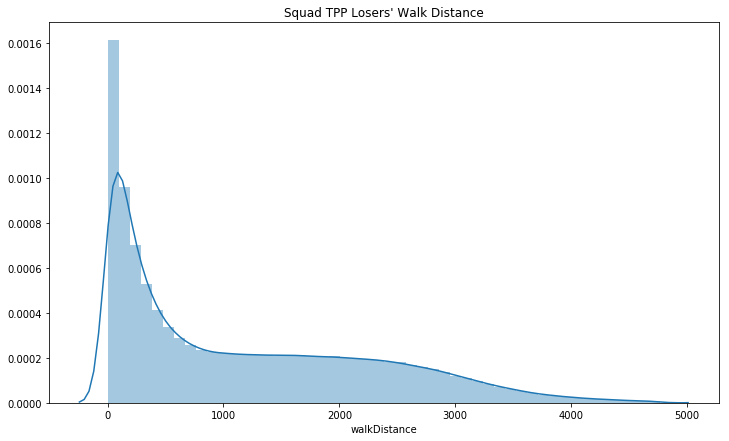

In [65]:
plt.figure(figsize=(12,7))
sns.distplot(sq[sq.winPlacePerc!=1].walkDistance).set_title("Squad TPP Losers' Walk Distance")

Text(0.5, 1.0, "Squad TPP Winners' Walk Distance")

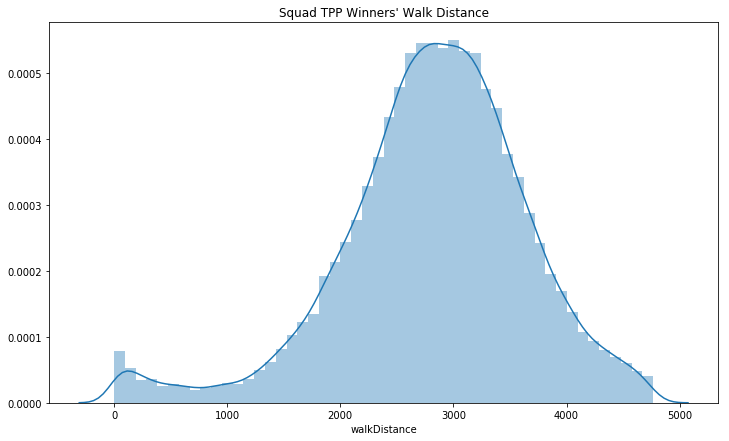

In [66]:
plt.figure(figsize=(12,7))
sns.distplot(sq[sq.winPlacePerc==1].walkDistance).set_title("Squad TPP Winners' Walk Distance")

In [67]:
print("The mean of walk distance of sqaud tpp losers is {:.3f} and the median is {}".format(sq[sq.winPlacePerc != 1].walkDistance.mean(), sq[sq.winPlacePerc != 1].walkDistance.median()))
print("The mean of walk distance of squad tpp winners is {:.3f} and the median is {}".format(sq[sq.winPlacePerc == 1].walkDistance.mean(), sq[sq.winPlacePerc == 1].walkDistance.median()))

The mean of walk distance of sqaud tpp losers is 1170.892 and the median is 817.9
The mean of walk distance of squad tpp winners is 2818.441 and the median is 2872.0


In [68]:
# testing mean difference

t, p = ttest_ind(sq[sq.winPlacePerc ==1].walkDistance,sq[sq.winPlacePerc !=1].walkDistance, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 290.278  p = 0


*Squad winners definitely walked more than losers. On average, they walked around twice more.

#### Boosts

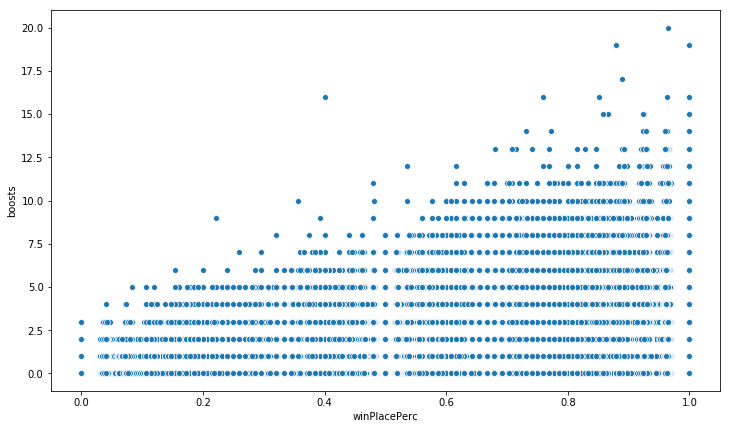

In [69]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='boosts', data = sq)

In [70]:
# dropping outliers

sq.drop(sq[sq.boosts > sq.boosts.mean() + 3*sq.boosts.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Squad TPP Losers' Used Boost Items")

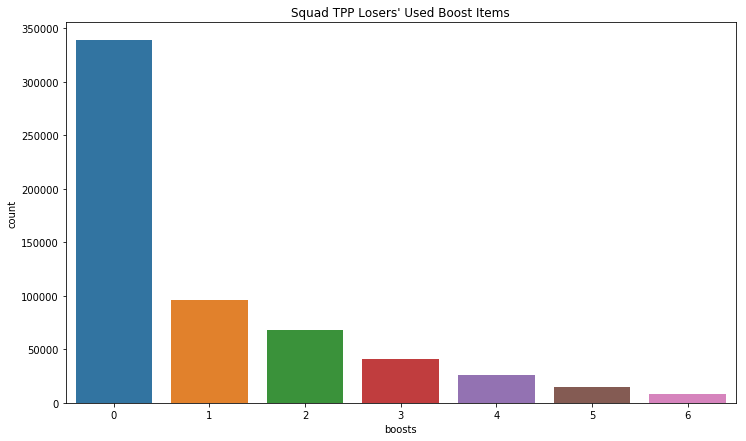

In [71]:
plt.figure(figsize=(12,7))
sns.countplot(sq[sq.winPlacePerc!=1].boosts).set_title("Squad TPP Losers' Used Boost Items")

Text(0.5, 1.0, "Squad TPP Winners' Used Boost Items")

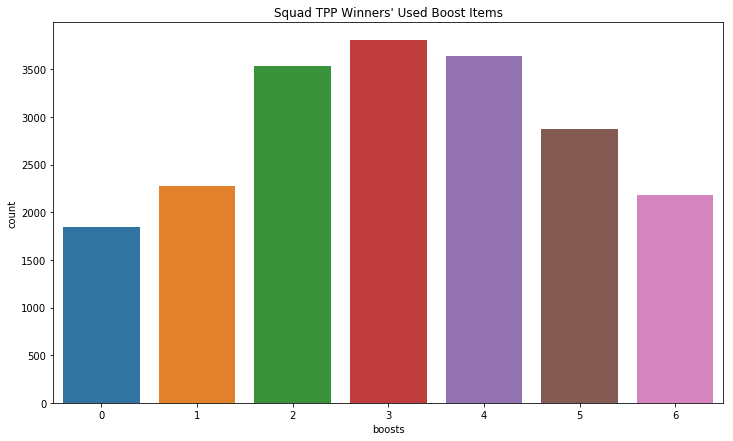

In [72]:
plt.figure(figsize=(12,7))
sns.countplot(sq[sq.winPlacePerc==1].boosts).set_title("Squad TPP Winners' Used Boost Items")

In [73]:
print("The mean number of boost items used by squad tpp losers is {:.3f} and the median is {}".format(sq[sq.winPlacePerc != 1].boosts.mean(), sq[sq.winPlacePerc != 1].boosts.median()))
print("The mean number of boost items used by squad tpp winners is {:.3f} and the median is {}".format(sq[sq.winPlacePerc == 1].boosts.mean(), sq[sq.winPlacePerc == 1].boosts.median()))

The mean number of boost items used by squad tpp losers is 0.984 and the median is 0.0
The mean number of boost items used by squad tpp winners is 3.114 and the median is 3.0


In [74]:
# testing mean difference

t, p = ttest_ind(sq[sq.winPlacePerc ==1].boosts,sq[sq.winPlacePerc !=1].boosts, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 168.068  p = 0


*Winners definitely used more boost itmes than losers. They used three times more on average.

#### Weapons Acquired

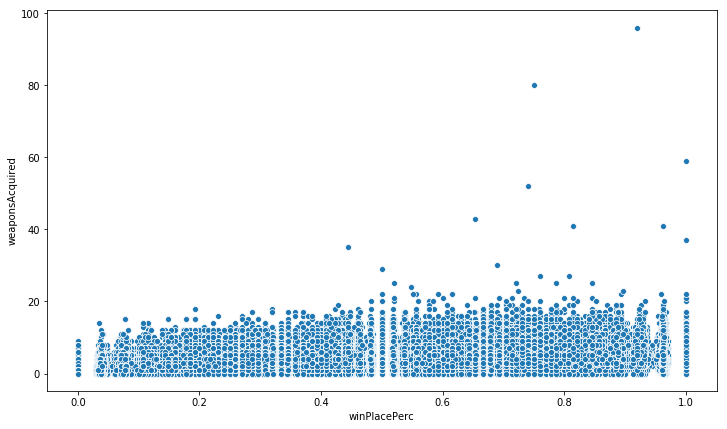

In [75]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='weaponsAcquired', data = sq)

In [76]:
# dropping outliers

sq.drop(sq[sq.weaponsAcquired > sq.weaponsAcquired.mean() + 3*sq.weaponsAcquired.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Squad TPP Losers' Number of Weapons Acquired")

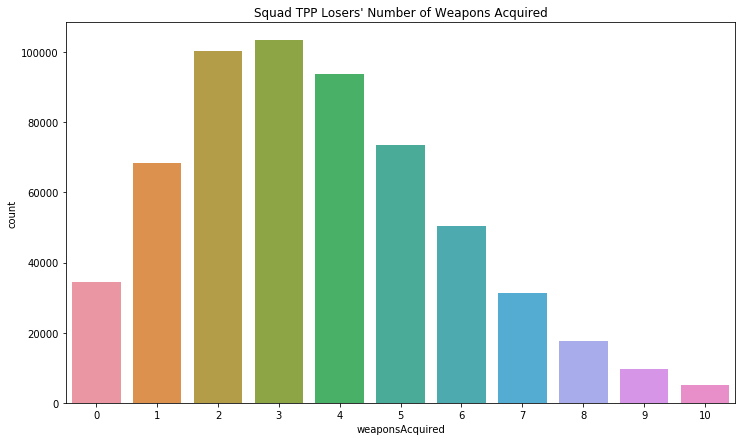

In [77]:
plt.figure(figsize=(12,7))
sns.countplot(sq[sq.winPlacePerc!=1].weaponsAcquired).set_title("Squad TPP Losers' Number of Weapons Acquired")

Text(0.5, 1.0, "Squad TPP Winners' Number of Weapons Acquired")

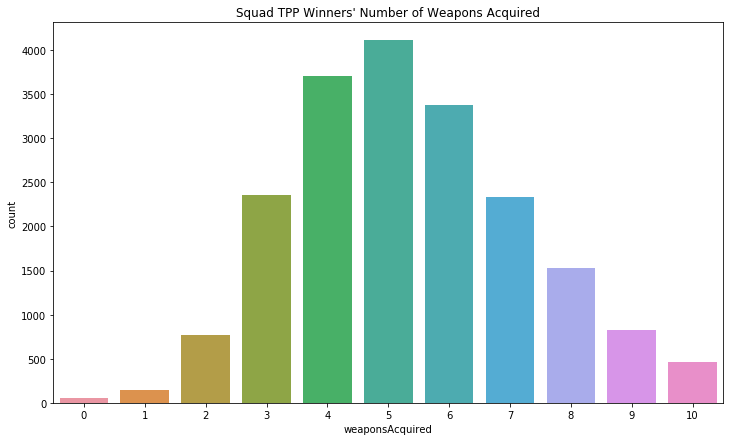

In [78]:
plt.figure(figsize=(12,7))
sns.countplot(sq[sq.winPlacePerc==1].weaponsAcquired).set_title("Squad TPP Winners' Number of Weapons Acquired")

In [79]:
print("The mean number of weapons acquired by squad tpp losers is {:.3f} and the median is {}".format(sq[sq.winPlacePerc != 1].weaponsAcquired.mean(), sq[sq.winPlacePerc != 1].weaponsAcquired.median()))
print("The mean number of weapons acquired by squad tpp winners is {:.3f} and the median is {}".format(sq[sq.winPlacePerc == 1].weaponsAcquired.mean(), sq[sq.winPlacePerc == 1].weaponsAcquired.median()))

The mean number of weapons acquired by squad tpp losers is 3.608 and the median is 3.0
The mean number of weapons acquired by squad tpp winners is 5.338 and the median is 5.0


In [80]:
# testing mean difference

t, p = ttest_ind(sq[sq.winPlacePerc ==1].weaponsAcquired,sq[sq.winPlacePerc !=1].weaponsAcquired, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 123.463  p = 0


*Winners definitely had more weapons than losers. On average, winners had 2 more weapons than losers.

#### Kills

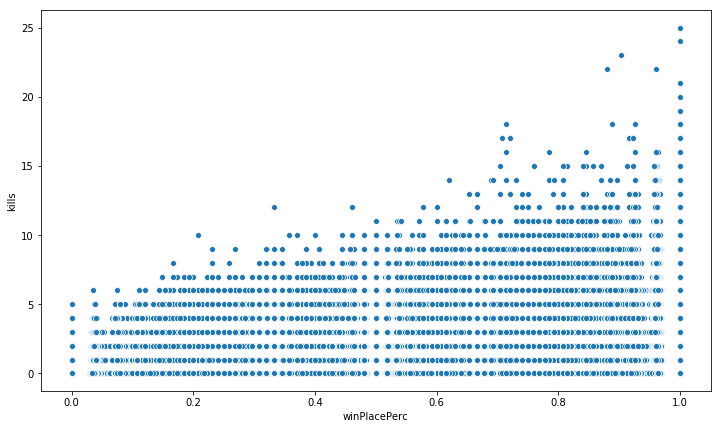

In [81]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='winPlacePerc', y='kills', data = sq)

In [82]:
# dropping outliers

sq.drop(sq[sq.kills > sq.kills.mean() + 3*sq.kills.std()].index, axis=0, inplace=True)

Text(0.5, 1.0, "Squad TPP Losers' Number of Kills")

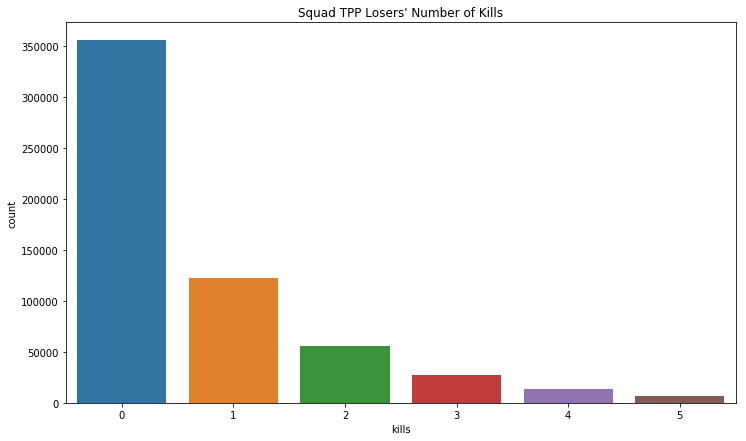

In [83]:
plt.figure(figsize=(12,7))
sns.countplot(sq[sq.winPlacePerc!=1].kills).set_title("Squad TPP Losers' Number of Kills")

Text(0.5, 1.0, "Squad TPP Winners' Number of Kills")

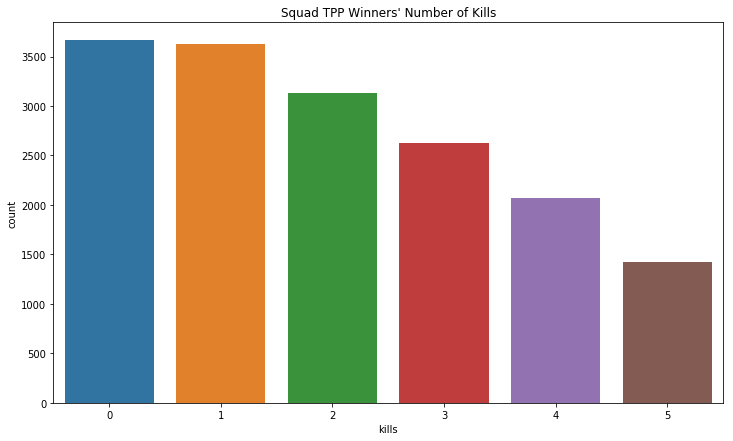

In [84]:
plt.figure(figsize=(12,7))
sns.countplot(sq[sq.winPlacePerc==1].kills).set_title("Squad TPP Winners' Number of Kills")

In [85]:
print("The mean number of kills by squad tpp losers is {:.3f} and the median is {}".format(sq[sq.winPlacePerc != 1].kills.mean(), sq[sq.winPlacePerc != 1].kills.median()))
print("The mean number of kills by squad tpp winners is {:.3f} and the median is {}".format(sq[sq.winPlacePerc == 1].kills.mean(), sq[sq.winPlacePerc == 1].kills.median()))

The mean number of kills by squad tpp losers is 0.691 and the median is 0.0
The mean number of kills by squad tpp winners is 2.004 and the median is 2.0


In [86]:
# testing mean difference

t, p = ttest_ind(sq[sq.winPlacePerc ==1].kills,duo[duo.winPlacePerc !=1].kills, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 102.825  p = 0


*On Average, squad tpp winners killed 2 more players than losers

### Solo vs Duo vs Squad
Now, I am going to compare walk distance, kills, boosts, and weapons acquired among solo, duo, and squad.

#### Walk Distance

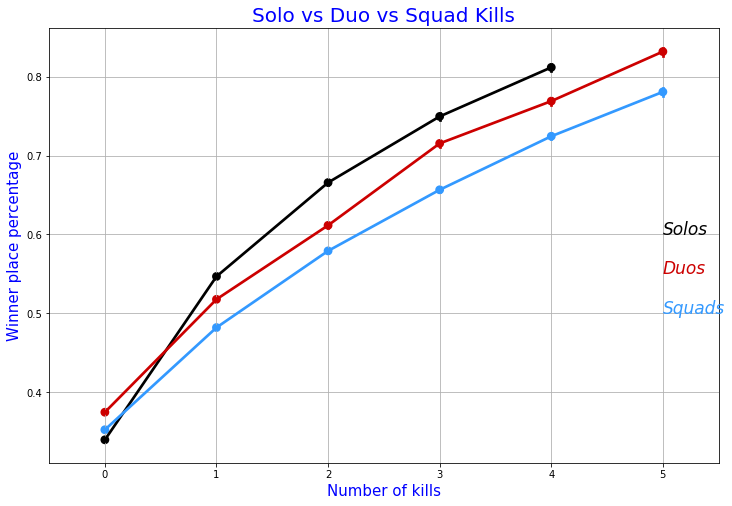

In [87]:
f,ax1 = plt.subplots(figsize =(12,8))
sns.pointplot(x='kills',y='winPlacePerc',data=solo,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duo,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=sq,color='#3399FF',alpha=0.8)
plt.text(5,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(5,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(5,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Winner place percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

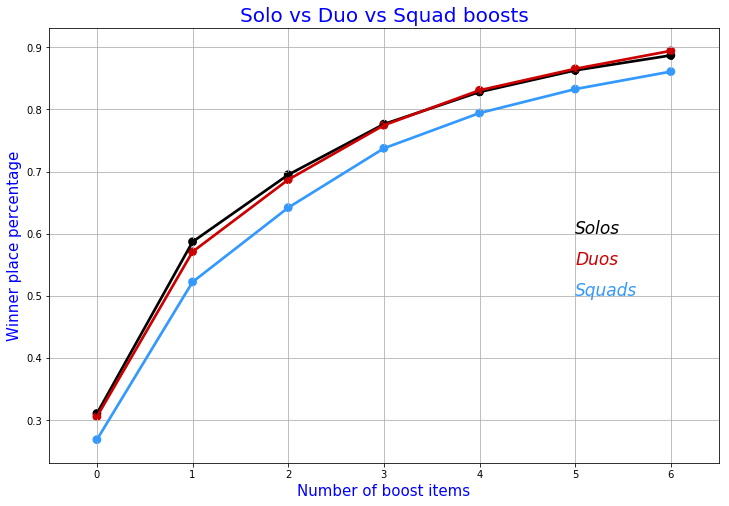

In [88]:
f,ax1 = plt.subplots(figsize =(12,8))
sns.pointplot(x='boosts',y='winPlacePerc',data=solo,color='black',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=duo,color='#CC0000',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=sq,color='#3399FF',alpha=0.8)
plt.text(5,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(5,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(5,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of boost items',fontsize = 15,color='blue')
plt.ylabel('Winner place percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

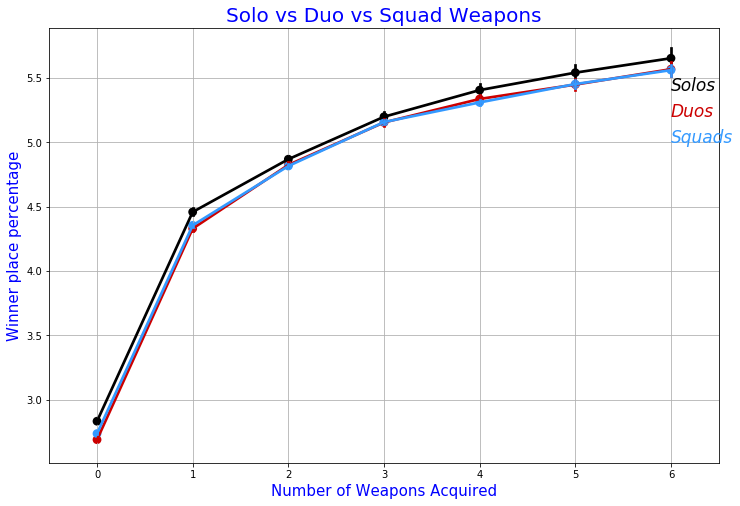

In [94]:
f,ax1 = plt.subplots(figsize =(12,8))
sns.pointplot(x='boosts',y='weaponsAcquired',data=solo,color='black',alpha=0.8)
sns.pointplot(x='boosts',y='weaponsAcquired',data=duo,color='#CC0000',alpha=0.8)
sns.pointplot(x='boosts',y='weaponsAcquired',data=sq,color='#3399FF',alpha=0.8)
plt.text(6,5.4,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(6,5.2,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(6,5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of Weapons Acquired',fontsize = 15,color='blue')
plt.ylabel('Winner place percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Weapons',fontsize = 20,color='blue')
plt.grid()
plt.show()